# Lab 3: Meshes and Attributes

Learning objectives: 

- After completing this lab, students will be able to:
- Build custom 3D meshes using vertex and triangle data.
- Apply scalar and vector attributes to influence rendering.
- Explore and compare visualizations using per-vertex and per-face (triangle) attributes.

## Theoretical Background: Meshes and Attributes

### What is a Mesh?

In 3D computer graphics, a **mesh** is a collection of vertices, edges, and faces that define the shape of a 3D object. It is the most common representation for rendering complex surfaces and models. Typically, faces are defined as **triangles** (or sometimes quadrilaterals), as triangles are simple, efficient, and always lie on a plane. A mesh can represent anything from basic geometric shapes (like cubes or spheres) to highly detailed scanned or simulated models.

A mesh is made up of:
- **Vertices**: Points in 3D space, each with an (x, y, z) coordinate.
- **Indices**: Groups of vertex indices that form triangular faces.
- **Topology**: The connectivity information that defines how triangles share edges and vertices.

---

### What are Attributes?

**Attributes** are additional data values associated with the vertices or faces of a mesh. These attributes influence how the mesh is rendered, colored, and shaded.

Types of common attributes:
- **Scalar attributes** (e.g., temperature, height, pressure) — typically used to generate color maps.
- **Vector attributes** (e.g., normals, flow directions) — used for lighting and directional encoding.
- **Face (triangle) attributes** — used to apply labels, regions, or segmentation colors.

Attributes can be associated with:
- **Vertices** (per-vertex): Smooth gradients and continuous color transitions.
- **Faces** (per-face or per-triangle): Hard boundaries and discrete classifications.

---

### Why Use Attributes?

Attributes allow for **data-driven visualization**, enabling users to:
- Visualize physical properties (height, stress, temperature).
- Add surface details without modifying geometry.
- Encode categories or segmentation labels for analysis.
- Simulate realistic lighting using surface normals.

---

Therefore, meshes define the **geometry** of 3D objects, while attributes define their **appearance and meaning**. By combining geometry with scalar or vector attributes, we unlock powerful visualization capabilities — from scientific simulations and medical imaging to game graphics and 3D modeling.


In [1]:
!pip install k3d

In [3]:
import k3d
import numpy as np

## Example 1. Creating a Simple Colored Triangle Mesh

A simple colored triangle mesh is the foundational building block in 3D graphics. It involves defining a set of vertices (points in 3D space) and connecting them using indices to form triangular faces. Each triangle is rendered by connecting three vertices, and together they can represent complex shapes. In this example, a square surface is created by defining four vertices and connecting them with two triangles. The mesh is then rendered using a uniform color, which gives it a flat, consistent appearance. This approach helps students understand the core structure of mesh data — vertex positions and triangle connectivity — and how it is used to define and visualize 3D surfaces.

In the following example, we will define a basic triangular surface (e.g., a square made of two triangles) and apply a single color to the entire mesh.

In [56]:
# Define four vertices of a square in 3D space
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0]
], dtype=np.float32)

# Define two triangles (faces) using vertex indices
indices = np.array([
    [0, 1, 2],
    [0, 2, 3]
], dtype=np.uint32)

# Create the mesh
plot = k3d.plot()
mesh = k3d.mesh(vertices, indices, color=0x00aaff, wireframe=True)
plot += mesh
plot.display()


Output()

In the example above we have shown how to manually build a mesh from scratch by defining its vertices and faces (triangles), and rendering it with a solid color and visible wireframe.

## Example 2. Adding Per-Vertex Scalar Attributes (e.g. Height Coloring)

Per-vertex scalar attributes allow us to enhance mesh visualizations by encoding data directly onto the surface. Instead of displaying a uniform color, we assign a scalar value to each vertex — for example, the Z-coordinate representing height — and use it to generate a color map. This technique creates a gradient effect across the mesh, visually representing changes in elevation, intensity, or other scalar fields. In practice, this method is widely used in scientific and engineering applications to display terrain height, temperature, pressure, or other measurements over a 3D surface. By mapping these attributes to colors, we gain a more informative and intuitive understanding of the underlying data.

In the following example, we will use a scalar value per vertex (e.g. Z coordinate) to color the mesh based on height.

In [58]:
z = vertices[:, 2]  # Z-values as scalar attribute (here all 0s for a flat surface)
colors = (z - z.min()) / (z.ptp() + 1e-8) * 0xFFFFFF  # Normalize and scale

plot = k3d.plot()
mesh = k3d.mesh(vertices, indices, attribute=colors.astype(np.float32), wireframe=False)
plot += mesh
plot.display()

Output()

In the example above, we have used a scalar value per vertex to color the mesh based on height. The mesh is now colored based on the scalar field (Z values), allowing you to encode height or intensity data visually.

## Example 3. Visualizing a Wavy Surface with Scalar Coloring

A wavy surface is a visually compelling way to demonstrate how geometry and scalar attributes interact in 3D mesh visualization. In this example, the Z-coordinate of each vertex is defined using a mathematical function, such as a sine wave, to simulate a rippled or undulating surface. The resulting height values are then used as scalar attributes to color the mesh. This creates a smooth gradient that not only shows the shape of the surface but also encodes additional information through color variation. Such visualizations are commonly used in physics, geography, and fluid simulations to illustrate wave propagation, energy distribution, or terrain patterns in a highly interpretable form.

In the following example, we will create a wave surface (e.g., sine-based) and visualize it using per-vertex scalar coloring.

In [60]:
x, y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))
z = np.sin(x**2 + y**2)

vertices = np.column_stack((x.ravel(), y.ravel(), z.ravel()))

# Build triangle indices
faces = []
res = x.shape[0]
for i in range(res - 1):
    for j in range(res - 1):
        idx = i * res + j
        faces.append([idx, idx + 1, idx + res])
        faces.append([idx + 1, idx + res + 1, idx + res])

indices = np.array(faces, dtype=np.uint32)

# Use Z as scalar attribute
colors = ((z.ravel() - z.min()) / (z.ptp() + 1e-8)) * 0xFFFFFF

plot = k3d.plot()
mesh = k3d.mesh(vertices.astype(np.float32), indices, attribute=colors.astype(np.float32))
plot += mesh
plot.display()


Output()

 We can see that we have created a 3D function surface and color it using the Z-values. This is similar to topographic or heatmap-style visualization.

## Example 4. Per-Triangle Coloring

Per-triangle coloring is a technique in mesh visualization where each triangular face is assigned a distinct color, rather than interpolating colors across vertices. This approach is useful for highlighting discrete regions, classifications, or categorical differences within a mesh. Unlike per-vertex coloring, which creates smooth transitions, per-triangle coloring results in sharp color boundaries that clearly delineate individual faces. It is particularly effective in applications such as segmentation maps, finite element analysis, and mesh debugging, where it is important to visually distinguish between separate elements or regions. In practice, this is achieved by assigning a scalar or label to each triangle and mapping it to a specific color using a color map.

In the following example, we will color each triangle independently using per-face attributes.

In [16]:
# Each face gets a color: alternate red and blue
face_colors = np.array([0xff0000 if i % 2 == 0 else 0x0000ff for i in range(len(indices))], dtype=np.uint32)

plot = k3d.plot()
mesh = k3d.mesh(vertices, indices, color_map=face_colors, wireframe=False, attribute_type='index')
plot += mesh
plot.display()


C:\Users\arija\anaconda3\Lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

Therefore, instead of coloring by vertex, you assign a color to each triangle (face), allowing for segmentation, classification, or grouping visualization.

## Example 5: Visualizing Vertex Normals as Arrows

Vertex normals are vectors that represent the orientation of a surface at each vertex and are essential for realistic lighting and shading in 3D graphics. Visualizing these normals as arrows helps in understanding the surface geometry and verifying the correctness of mesh orientation. In this example, normals are computed as gradient vectors from the surface height and rendered using `k3d.vectors`, which draws arrows at each vertex pointing in the direction of the normal. This provides an intuitive visualization of how the surface curves and changes, making it easier to debug issues with shading, simulate physical interactions like wind or light reflection, or analyze geometric properties of the mesh.

In the following example, we will compute and display normals on a mesh surface using k3d.vectors.

In [19]:
# Generate a bumpy surface
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
z = np.sin(3 * x) * np.cos(3 * y)
vertices = np.stack((x.ravel(), y.ravel(), z.ravel()), axis=1)

# Build triangle indices
faces = []
res = x.shape[0]
for i in range(res - 1):
    for j in range(res - 1):
        idx = i * res + j
        faces.append([idx, idx + 1, idx + res])
        faces.append([idx + 1, idx + res + 1, idx + res])
indices = np.array(faces, dtype=np.uint32)

# Approximate normals (finite difference gradient)
normals = np.zeros_like(vertices)
dx, dy = np.gradient(z)
dz = np.ones_like(dx)
normals[:, 0] = -dx.ravel()
normals[:, 1] = -dy.ravel()
normals[:, 2] = dz.ravel()

# Normalize the vectors
norms = np.linalg.norm(normals, axis=1, keepdims=True)
normals /= (norms + 1e-8)

# Display surface and normals
plot = k3d.plot()
plot += k3d.mesh(vertices.astype(np.float32), indices)
plot += k3d.vectors(vertices.astype(np.float32), normals.astype(np.float32), scale=0.1, color=0xff0000)
plot.display()

Output()

We have now learned how to calculate and visualize surface normals as vector fields.

## Example 6: Gradient-Colored Mesh Using Distance from Center

Coloring a mesh based on the distance of each vertex from a central point creates a visually intuitive radial gradient, which can highlight spatial relationships and symmetry within the geometry. In this example, the Euclidean distance from the origin (or any defined center) is computed for each vertex and used as a scalar attribute to determine color. The result is a smooth transition of color from the center outward, emphasizing depth, distance, or influence zones. This technique is especially useful in visualizing heatmaps, radial fields, proximity effects, or attention zones in simulations, user interaction models, or environmental analyses.

In this example, we will color a mesh using the distance from the center point as an attribute.

In [21]:
import k3d
import numpy as np

# Create circular grid
x, y = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
r = np.sqrt(x**2 + y**2)
z = np.sin(r)

vertices = np.stack((x.ravel(), y.ravel(), z.ravel()), axis=1)

# Triangles
faces = []
res = x.shape[0]
for i in range(res - 1):
    for j in range(res - 1):
        idx = i * res + j
        faces.append([idx, idx + 1, idx + res])
        faces.append([idx + 1, idx + res + 1, idx + res])
indices = np.array(faces, dtype=np.uint32)

# Attribute = distance from center (radial gradient)
dist = np.sqrt(vertices[:, 0]**2 + vertices[:, 1]**2)
attr = (dist - dist.min()) / (dist.ptp() + 1e-8) * 0xFFFFFF

plot = k3d.plot()
plot += k3d.mesh(vertices.astype(np.float32), indices, attribute=attr.astype(np.float32))
plot.display()

Output()

We have now seen how scalar attributes derived from geometry can produce radial or gradient-based color maps.

### Example 7: Animate a Breathing Surface (Waves)

Animating a breathing surface using waves introduces dynamic visualization by modifying the mesh geometry over time. In this example, the Z-coordinates of the mesh vertices are continuously updated using a sine function that changes with each animation frame, creating a smooth pulsating or "breathing" effect. This type of animation simulates natural phenomena such as water ripples, oscillating membranes, or terrain deformations. It helps students understand how real-time updates to vertex positions can create the illusion of motion in a 3D environment. Moreover, it illustrates the powerful interplay between geometry and time in applications such as scientific simulations, procedural animation, and visual storytelling.

In the following examplw, we will apply animated vertex displacements over time using sine waves.

In [51]:
import time

x, y = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
vertices_template = np.stack((x.ravel(), y.ravel(), np.zeros_like(x).ravel()), axis=1)

faces = []
res = x.shape[0]
for i in range(res - 1):
    for j in range(res - 1):
        idx = i * res + j
        faces.append([idx, idx + 1, idx + res])
        faces.append([idx + 1, idx + res + 1, idx + res])
indices = np.array(faces, dtype=np.uint32)

# Create base mesh
plot = k3d.plot()
mesh = k3d.mesh(vertices_template.astype(np.float32), indices, wireframe=False)
plot += mesh
plot.display()

# Animate "breathing"
for t in range(100):
    z = np.sin(np.sqrt(x**2 + y**2) * 4 - t * 0.1)
    vertices = np.stack((x.ravel(), y.ravel(), z.ravel()), axis=1)
    mesh.vertices = vertices.astype(np.float32)
    time.sleep(0.05)

Output()

We have now animated the Z-coordinate of mesh vertices to simulate natural motion (breathing, pulsing, waves).

### Example 8: Simple Per-Vertex Colored Mesh

A simple per-vertex colored mesh demonstrates how individual vertex colors can be used to control the appearance of a 3D surface. In this example, a square is constructed using four vertices and two triangles, and each vertex is assigned a specific color. When the mesh is rendered, the colors are smoothly interpolated across the surface of each triangle, creating a gradient effect between connected vertices. This approach is highly efficient and visually expressive, allowing for localized color control without complex shading or texture mapping. Per-vertex coloring is widely used in scientific visualization, modeling, and interactive graphics to represent data variation or region segmentation across a mesh.


In [80]:
# Create a simple square mesh made of two triangles
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0]
], dtype=np.float32)

indices = np.array([
    [0, 1, 2],
    [0, 2, 3]
], dtype=np.uint32)

# Assign per-vertex colors (green, green, red, red)
# Each vertex has one color; shared vertices will blend between them
colors = np.array([
    0x00ff00,  # green
    0x00ff00,  # green
    0xff0000,  # red
    0xff0000   # red
], dtype=np.uint32)

# Display the mesh
plot = k3d.plot()
mesh = k3d.mesh(
    vertices=vertices,
    indices=indices,
    colors=colors
)
plot += mesh
plot.display()

Output()

### Example 9. Assign More Than Two Colors (4 Unique Vertex Colors)

Assigning more than two colors in a mesh allows for richer visual effects and better control over how color transitions appear across a surface. In this example, four vertices define the corners of a square mesh, and each vertex is assigned a distinct color: red, green, blue, and yellow. When rendered, K3D smoothly interpolates these colors across the triangular faces, creating gradients that visually blend the vertex colors. This technique is useful for demonstrating color interpolation, encoding categorical data at specific points, or simply enhancing the aesthetic of 3D visualizations. It also serves as a foundation for more advanced per-vertex shading and artistic effects in computer graphics.


In [83]:
vertices = np.array([
    [0, 0, 0],  # bottom-left
    [1, 0, 0],  # bottom-right
    [1, 1, 0],  # top-right
    [0, 1, 0]   # top-left
], dtype=np.float32)

indices = np.array([
    [0, 1, 2],
    [0, 2, 3]
], dtype=np.uint32)

# Assign unique color to each vertex
colors = np.array([
    0xff0000,  # red
    0x00ff00,  # green
    0x0000ff,  # blue
    0xffff00   # yellow
], dtype=np.uint32)

plot = k3d.plot()
plot += k3d.mesh(vertices=vertices, indices=indices, colors=colors)
plot.display()


Output()

This creates a quad mesh where each corner has a unique color — showing how gradients blend across the surface.

Now we will use elevation (Z) to drive colors. Using elevation (Z-coordinate) to drive vertex colors is a powerful technique for visualizing scalar fields on 3D surfaces. In this approach, the height of each vertex is mapped to a color using a continuous gradient—typically from cool to warm colors—creating a visually intuitive representation of elevation or intensity. For example, lower points might appear blue while higher points shift toward red or yellow. This method is especially useful in applications such as terrain modeling, topographic mapping, and scientific simulations, where it provides immediate visual feedback about height variations or other scalar quantities distributed across a mesh.

In [86]:
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
z = np.sin(np.pi * x) * np.cos(np.pi * y)
vertices = np.stack([x.ravel(), y.ravel(), z.ravel()], axis=1)

# Generate grid triangles
faces = []
res = x.shape[0]
for i in range(res - 1):
    for j in range(res - 1):
        idx = i * res + j
        faces.append([idx, idx + 1, idx + res])
        faces.append([idx + 1, idx + res + 1, idx + res])
faces = np.array(faces, dtype=np.uint32)

# Map Z to color gradient (from blue to red)
norm_z = (z.ravel() - z.min()) / (z.ptp() + 1e-8)
colors = (norm_z * 0xFFFFFF).astype(np.uint32)

plot = k3d.plot()
plot += k3d.mesh(vertices=vertices.astype(np.float32), indices=faces, colors=colors)
plot.display()


Output()

Finally, we will animate the Z-values over time to create a breathing/wave effect, while also updating colors based on Z.

Animating the Z-values of a mesh over time introduces dynamic behavior into an otherwise static 3D surface. By periodically updating the height (Z-coordinate) of each vertex using a mathematical function like a sine wave, the surface appears to pulse or breathe, mimicking natural phenomena such as water ripples, soft tissue expansion, or wave propagation. Simultaneously updating the vertex colors based on the animated Z-values further enhances the effect, allowing users to visually track elevation changes in real time. This technique is ideal for illustrating time-dependent data, simulating physical behavior, or simply adding interactivity and life to a visualization.

In [94]:
import time

plot = k3d.plot()
vertices_template = vertices.copy()

# Start with a static mesh
mesh = k3d.mesh(vertices=vertices_template.astype(np.float32), indices=faces)
plot += mesh
plot.display()

# Animate waves and color
for t in range(100):
    z_wave = np.sin(np.pi * x + t * 0.1) * np.cos(np.pi * y + t * 0.1)
    vertices_anim = np.stack([x.ravel(), y.ravel(), z_wave.ravel()], axis=1)

    norm_z = (z_wave.ravel() - z_wave.min()) / (z_wave.ptp() + 1e-8)
    colors = (norm_z * 0xFFFFFF).astype(np.uint32)

    mesh.vertices = vertices_anim.astype(np.float32)
    mesh.colors = colors
    time.sleep(0.05)


Output()

## Tasks

### Task 1. Build and Color a Custom Mesh

Create a custom 3D mesh (e.g., a pyramid, cube, or terrain patch) using manual vertex and triangle definitions.
Apply:
- Per-vertex scalar attributes (e.g., height).
- Per-face classification (e.g., assign face colors).
- Toggle wireframe=True to debug your mesh structure.
- Animate vertex heights over time (simulating waves or breathing).

In [1]:
import k3d
import numpy as np
import time


vertices = np.array([
    [0, 0, 0],   
    [1, 0, 0],   
    [1, 1, 0],   
    [0, 1, 0],   
    [0.5, 0.5, 1]  
], dtype=np.float32)

indices = np.array([
    [0, 1, 4],  
    [1, 2, 4],  
    [2, 3, 4],  
    [3, 0, 4],  
    [0, 1, 2],  
    [0, 2, 3],  
], dtype=np.uint32)


heights = vertices[:, 2]  # Z coordinate as height
vertex_attr = (heights - heights.min()) / (heights.ptp() + 1e-8) * 0xFFFFFF


face_colors = np.array([
    0xff0000,  # side 1 - red
    0x0000ff,  # side 2 - blue
    0xff0000,  # side 3 - red
    0x0000ff,  # side 4 - blue
    0x00ff00,  # base 1 - green
    0x00ff00,  # base 2 - green
], dtype=np.uint32)


plot = k3d.plot()
mesh = k3d.mesh(
    vertices=vertices.astype(np.float32),
    indices=indices,
    attribute=vertex_attr.astype(np.float32),
    color_map=face_colors,
    attribute_type='index',
    wireframe=True 
)
plot += mesh
plot.display()

time.sleep(1)


for t in range(100):
    new_vertices = vertices.copy()
    new_vertices[4, 2] = 1 + 0.3 * np.sin(t * 0.1)
    heights = new_vertices[:, 2]
    vertex_attr = (heights - heights.min()) / (heights.ptp() + 1e-8) * 0xFFFFFF
    mesh.vertices = new_vertices.astype(np.float32)
    mesh.attribute = vertex_attr.astype(np.float32)
    time.sleep(0.05)


Output()

### Task 2. Visualize a Custom Terrain with Height-Based Coloring

Create a terrain mesh using a custom height function and visualize it with a color gradient based on elevation (Z).

Steps:
- Use np.meshgrid to create a 2D grid of X and Y values.
- Define a Z function, such as Z = sin(X) * cos(Y) or any other creative wave.
- Stack X, Y, and Z into a vertices array.
- Create triangle indices manually from the grid.
- Normalize Z-values and convert them into color values.
- Visualize the mesh using k3d.mesh(vertices, indices, colors=...).

As outcome you should obtain a colorful 3D terrain where elevation is encoded visually, helping students understand how scalar data maps to color.

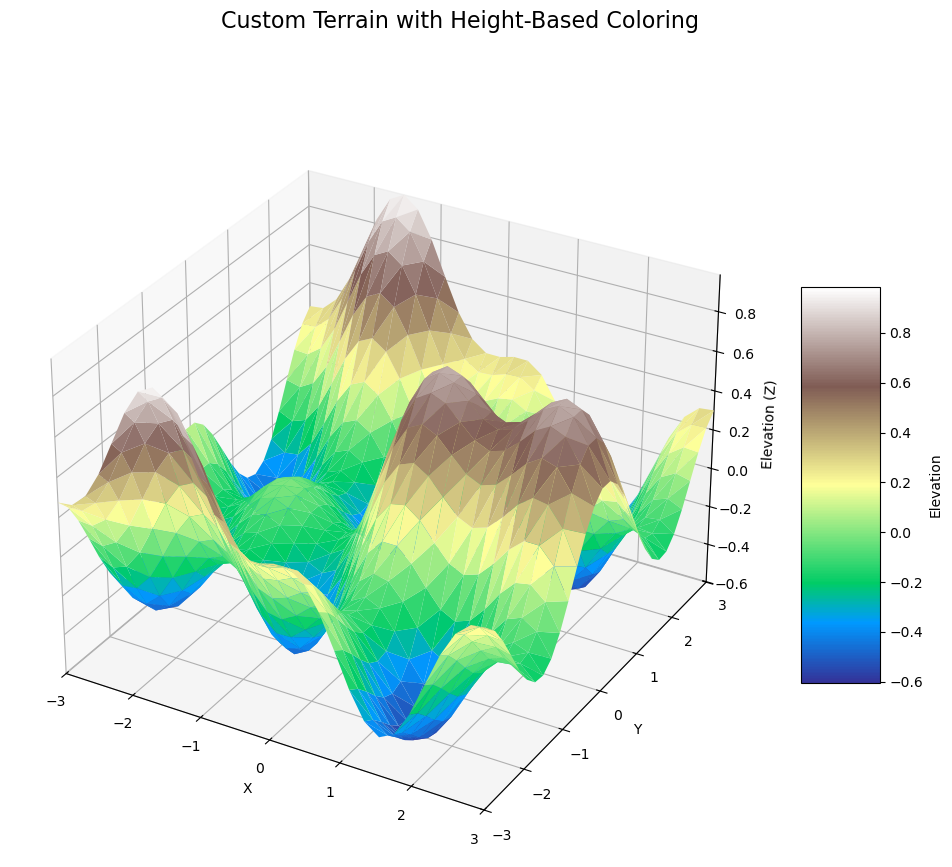

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as colors

# Parameters
grid_size = 30
x = np.linspace(-3, 3, grid_size)
y = np.linspace(-3, 3, grid_size)
X, Y = np.meshgrid(x, y)

# Custom height function
Z = 0.5 * np.sin(X) * np.cos(Y) + 0.2 * np.sin(3*X) + 0.3 * np.cos(2*Y)

# Vertices
vertices = np.vstack([X.flatten(), Y.flatten(), Z.flatten()]).T

# Triangles (faces)
triangles = []
for i in range(grid_size-1):
    for j in range(grid_size-1):
        p1 = i * grid_size + j
        p2 = i * grid_size + j + 1
        p3 = (i + 1) * grid_size + j + 1
        p4 = (i + 1) * grid_size + j
        triangles.append([p1, p2, p3])
        triangles.append([p1, p3, p4])
triangles = np.array(triangles)

# Normalize Z for coloring
z_min, z_max = Z.min(), Z.max()
z_normalized = (Z.flatten() - z_min) / (z_max - z_min)

# Plotting
fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=0.9)
fig.suptitle('Custom Terrain with Height-Based Coloring', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

mesh = []
face_colors = []
cmap = plt.cm.terrain

for triangle in triangles:
    triangle_vertices = vertices[triangle]
    mesh.append(triangle_vertices)
    avg_z = np.mean(Z.flatten()[triangle])
    color_val = (avg_z - z_min) / (z_max - z_min)
    face_colors.append(cmap(color_val))

terrain = Poly3DCollection(mesh, alpha=1.0)
terrain.set_facecolors(face_colors)
ax.add_collection3d(terrain)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(Z.min(), Z.max())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation (Z)')

norm = colors.Normalize(vmin=z_min, vmax=z_max)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, shrink=0.5, aspect=5, label='Elevation')

plt.show()


### Task 3. Segment a Mesh into 4 Colored Regions

Divide a square mesh into four quadrants and assign each region a unique color using per-vertex coloring.
Steps:
- Generate a flat 2D grid using np.meshgrid.
- Create vertex coordinates and triangle indices.
- Determine the quadrant of each vertex based on (x, y) positions.
- Assign one of four colors (e.g., red, green, blue, yellow) to each vertex based on its region.
- Visualize the result using k3d.mesh with colors= argument.

As outcome you should obtain a flat square mesh with four visually distinct colored regions, reinforcing how vertex colors affect rendering.

In [5]:
import numpy as np
import k3d

# Step 1: Generate a flat 2D grid
grid_size = 40
x, y = np.meshgrid(np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size))

# Step 2: Create vertex coordinates (flattened grid)
vertices = np.stack((x.ravel(), y.ravel(), np.zeros_like(x).ravel()), axis=1).astype(np.float32)

# Step 3: Create triangle indices for the mesh
faces = []
for i in range(grid_size - 1):
    for j in range(grid_size - 1):
        idx = i * grid_size + j
        faces.append([idx, idx + 1, idx + grid_size])
        faces.append([idx + 1, idx + grid_size + 1, idx + grid_size])
indices = np.array(faces, dtype=np.uint32)

# Step 4: Assign colors by quadrant
# K3D expects colors as 0xRRGGBB (red, green, blue, yellow)
red    = 0xff0000
green  = 0x00ff00
blue   = 0x0000ff
yellow = 0xffff00

x_coords = vertices[:, 0]
y_coords = vertices[:, 1]
colors = np.zeros(vertices.shape[0], dtype=np.uint32)

colors[(x_coords >= 0) & (y_coords >= 0)] = red      # Quadrant I
colors[(x_coords <  0) & (y_coords >= 0)] = green    # Quadrant II
colors[(x_coords <  0) & (y_coords <  0)] = blue     # Quadrant III
colors[(x_coords >= 0) & (y_coords <  0)] = yellow   # Quadrant IV

# Step 5: Visualize the mesh with per-vertex coloring
plot = k3d.plot()
mesh = k3d.mesh(vertices, indices, colors=colors)
plot += mesh
plot.display()


Output()

### Task 4: Create an Animated Breathing Surface

Animate a mesh surface by updating Z-values over time to simulate a breathing or wave-like effect.
Steps:
- Start with a static grid mesh (vertices and triangle indices).
- In a loop, update the Z-values using a time-dependent sine function.
- Recalculate vertex positions and update mesh.vertices.
- Update vertex colors using normalized Z values.
- Add a short time.sleep() to simulate animation.

As outcome you should obtain a dynamic, pulsing surface where height and color both change over time — ideal for understanding animation and scalar mapping.



### Task 5: Build a Mesh with a Central Peak and Visual Gradient

Create a radial mesh with a central peak and visualize a smooth color gradient from center to edges based on distance.
Steps:
- Create a grid of (x, y) values from -1 to 1.
- Define Z as a Gaussian bump (e.g., Z = exp(-r^2), where r = sqrt(x² + y²)).
- Stack the coordinates into a vertex array.
- Build triangle indices for the grid.
- Calculate distances from center and convert them into a smooth color gradient.
- Use colors= in k3d.mesh to apply the coloring.

As outcome you should obtain a visually appealing 3D bump mesh with color radiating from the center outward, illustrating distance-based coloring.